# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [2]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [4]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:wheelchair_speed-e706:Initialising MQTT connection for Thing 'dcd:things:wheelchair_speed-e706'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:wheelchair_speed-e706:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706 HTTP/1.1" 200 6724


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:wheelchair_speed-e706', 'name': 'Wheelchair_speed', 'description': '', 'type': 'Speed', 'properties': [{'type': 'THREE_DIMENSIONS', 'name': 'My Random Property', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}], 'id': 'my-random-property-5f3c', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572257884433, 'registeredAt': 1571392699000}, {'type': 'ONE_DIMENSION', 'name': 'one', 'description': '', 'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}], 'id': 'one-28d7', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572257884433, 'registeredAt': 1571994791000}, {

What does a Thing look like?

In [5]:
my_thing.to_json()

{'id': 'dcd:things:wheelchair_speed-e706',
 'name': 'Wheelchair_speed',
 'description': '',
 'type': 'Speed',
 'properties': [{'id': 'my-random-property-5f3c',
   'name': 'My Random Property',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''}]},
  {'id': 'one-28d7',
   'name': 'one',
   'description': '',
   'type': 'ONE_DIMENSION',
   'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}]},
  {'id': 'random-shit-aa03',
   'name': 'RANDOM SHIT',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Val

Which property do we want to explore and over which time frame?

In [6]:
from datetime import datetime
# What dates?
START_DATE = "2019-10-26 15:26:00"
END_DATE = "2019-10-26 15:27:00"

from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [7]:
PROPERTY_NAME = "one"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706/properties/one-28d7?from=1572096360000.0&to=1572096420000.0 HTTP/1.1" 200 2028


How many data point did we get?

In [8]:
print(len(my_property.values))

30


Display values

In [9]:
my_property.values

[[1572096361368, 0.664703],
 [1572096363373, 0.199614],
 [1572096365375, 0.231955],
 [1572096367378, 0.659064],
 [1572096369380, 0.836792],
 [1572096371381, 0.428476],
 [1572096373388, 0.858621],
 [1572096375390, 0.524137],
 [1572096377393, 0.997997],
 [1572096379400, 0.15736],
 [1572096381406, 0.589174],
 [1572096383413, 0.176583],
 [1572096385419, 0.908057],
 [1572096387425, 0.4808],
 [1572096389432, 0.889613],
 [1572096391438, 0.305956],
 [1572096393443, 0.322166],
 [1572096395450, 0.582416],
 [1572096397454, 0.983308],
 [1572096399459, 0.681304],
 [1572096401461, 0.217932],
 [1572096403464, 0.396901],
 [1572096405467, 0.19473],
 [1572096407471, 0.913408],
 [1572096409478, 0.838001],
 [1572096411480, 0.0681447],
 [1572096413483, 0.146395],
 [1572096415490, 0.890078],
 [1572096417496, 0.718172],
 [1572096419501, 0.999435]]

In [10]:
import pandas as pd
data = my_property.values
df = pd.DataFrame(my_property.values, columns = ['time', 'velocity'])
df.to_csv('test.csv')

DEBUG:matplotlib:$HOME=C:\Users\Pak_l
DEBUG:matplotlib:CONFIGDIR=C:\Users\Pak_l\.matplotlib
DEBUG:matplotlib:matplotlib data path: c:\users\pak_l\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file c:\users\pak_l\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.1.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstr

DEBUG:matplotlib:CACHEDIR=C:\Users\Pak_l\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Pak_l\.matplotlib\fontlist-v310.json


# From CSV

In [11]:
from numpy import genfromtxt
import pandas as pd
data = genfromtxt('test.csv', delimiter=',')
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['x', 'y'])
data_frame

,x,y
NaT,NaN,NaN
1970-01-01 00:00:00.000,1.572096e+12,0.664703
1970-01-01 00:00:00.001,1.572096e+12,0.199614
1970-01-01 00:00:00.002,1.572096e+12,0.231955
1970-01-01 00:00:00.003,1.572096e+12,0.659064
1970-01-01 00:00:00.004,1.572096e+12,0.836792
1970-01-01 00:00:00.005,1.572096e+12,0.428476
1970-01-01 00:00:00.006,1.572096e+12,0.858621
1970-01-01 00:00:00.007,1.572096e+12,0.524137
1970-01-01 00:00:00.008,1.572096e+12,0.997997


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
data = np.array(my_property.values)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


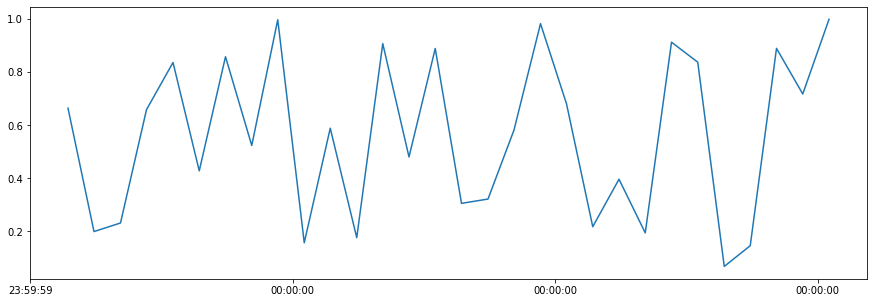

In [14]:
figure(num=None, figsize=(15, 5))
t = data_frame.index
#plt.plot(t, data_frame.x, t, data_frame.y)
plt.plot(t,data_frame.y)

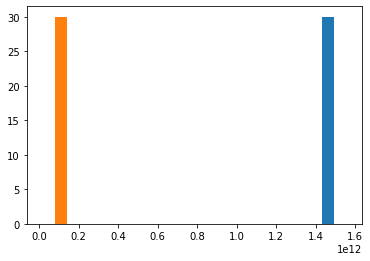

In [24]:
plt.hist(data[:,:])
plt.show()

# Generate statistics with NumPy and Pandas

In [25]:
import numpy as np
from scipy.stats import kurtosis, skew

In [27]:
np.min(data[:,1:4], axis=0)

array([0.0681447])

In [29]:
skew(data[:,1:4])

array([-0.06839997])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [30]:
data[:10,1:]

array([[0.664703],
       [0.199614],
       [0.231955],
       [0.659064],
       [0.836792],
       [0.428476],
       [0.858621],
       [0.524137],
       [0.997997],
       [0.15736 ]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [31]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0
count,30.000000
mean,0.562043
std,0.305985
min,0.068145
25%,0.250455
50%,0.585795
75%,0.853466
max,0.999435


In [32]:
data_frame.rolling(10).std()

,0
2019-10-26 13:26:01.368,NaN
2019-10-26 13:26:03.373,NaN
2019-10-26 13:26:05.375,NaN
2019-10-26 13:26:07.378,NaN
2019-10-26 13:26:09.380,NaN
2019-10-26 13:26:11.381,NaN
2019-10-26 13:26:13.388,NaN
2019-10-26 13:26:15.390,NaN
2019-10-26 13:26:17.393,NaN
2019-10-26 13:26:19.400,0.297477


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

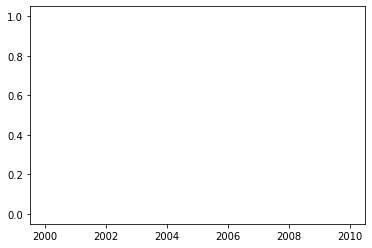

In [33]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

In [32]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

NameError: name 'data_frame' is not defined

# Zero Crossing

In [ ]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions